In [82]:
using Plots
using StatsBase

using NBInclude
@nbinclude("localsearch.ipynb")
@nbinclude("testing_RM.ipynb")


LoadError: LoadError: cannot assign a value to imported variable StatsBase.mode from module Main
in expression starting at c:\Users\mgnli\OneDrive - Dartmouth College\Documents\dcj-heuristics\localsearch.ipynb:In[12]:11

Variables

In [ ]:
n = 5
x = 5

max_dcj_dist = n + x

target = generate_target_with_xdup(n, x)
src = scramble_target(target)

total_maps = max_dcj_dist
rand_maps = 5
max_neighbors = 7

run_mode = "none"
dupchar_to_unique_chars = OrderedDict{Char, Vector{Char}}()
min_change_neighbor = true 

true

DCJ Distance Distributions for OLD neighbor & MCN definitions (same params)

RM overlaid on top to see what was generated randomly and what was found via neighborhood exploration

In [ ]:
min_dcj_MCN, _, _, map_to_dedupstr_dcjdist_MCN, og_rm_MCN, _ = localsearch(src, target, total_maps, rand_maps, max_neighbors, run_mode, dupchar_to_unique_chars, min_change_neighbor)
min_dcj_OLD, _, _, map_to_dedupstr_dcjdist_OLD, og_rm_OLD, _ = localsearch(src, target, total_maps, rand_maps, max_neighbors, run_mode, dupchar_to_unique_chars, !min_change_neighbor)


# old neighbor def 
rm_dcj_dists = [tupl[2] for tupl in values(og_rm_OLD)]
dcjdists = [tupl[2] for tupl in values(map_to_dedupstr_dcjdist_OLD)]
print("max dcj dist=", max_dcj_dist)

xticks = collect(0:max_dcj_dist)
bins_range = range(0, maximum(max_dcj_dist)+1, maximum(max_dcj_dist))
h1 = histogram(dcjdists, xticks=xticks, bins=bins_range, title="LS DCJ dist distribution with OLD neighbor defn", label="local search maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:blue)
histogram!(h1, rm_dcj_dists, xticks=xticks, bins=bins_range, label="random maps", alpha=0.5, color=:green)

# min change neighbor defn
rm_dcj_dists = [tupl[2] for tupl in values(og_rm_MCN)]
dcjdists = [tupl[2] for tupl in values(map_to_dedupstr_dcjdist_MCN)]
print("max dcj dist=", max_dcj_dist)
    
xticks = collect(0:max_dcj_dist)
bins_range = range(0, maximum(max_dcj_dist)+1, maximum(max_dcj_dist))
h2 = histogram(dcjdists, xticks=xticks, bins=bins_range, title="with MCN", label="local search maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:blue)
histogram!(h2, rm_dcj_dists, xticks=xticks, bins=bins_range, label="random maps", alpha=0.5, color=:green)

# plot 
plot(h1, h2, layout=(1, 2), size=(800, 400))

max dcj dist=25

LoadError: cannot assign a value to imported variable Plots.xticks from module Main

Distribution of DCJ distance differences (new neighbor - original neighbor) for the two definitions of neighbors

In [ ]:
_, _, _, _, _, diffs_MCN = localsearch(src, target, total_maps, rand_maps, max_neighbors, run_mode, dupchar_to_unique_chars, min_change_neighbor)
_, _, _, _, _, diffs_OLD = localsearch(src, target, total_maps, rand_maps, max_neighbors, run_mode, dupchar_to_unique_chars, !min_change_neighbor)

# y axis 
mode_freq_OLD = count(x -> x == mode(diffs_OLD), diffs_OLD)
mode_freq_MCN = count(x -> x == mode(diffs_MCN), diffs_MCN)
max_freq = maximum([mode_freq_OLD, mode_freq_MCN])
yticks = collect(0:max_freq+1)
ylims=(0,max_freq)

# x axis 
max_diff = maximum([maximum(diffs_OLD), maximum(diffs_MCN)])
min_diff = minimum([minimum(diffs_OLD)-1, minimum(diffs_MCN)-1, 0])

bins_range_OLD = range(min_diff, max_diff+2)
bins_range_MCN = range(min_diff, max_diff+2)

xticks = collect(min_diff:max_diff+1)

h1 = histogram(diffs_OLD, title="OLD", alpha=0.5, bins=bins_range_OLD, xticks=xticks, yticks=yticks, ylims=ylims, xlabel="Value", ylabel="Frequency")
h2 = histogram(diffs_MCN, title="MCN",  alpha=0.5, bins=bins_range_MCN, xticks=xticks, yticks=yticks, ylims=ylims, xlabel="Value", ylabel="Frequency")

println("new neighbor - original neighbor::")
println("old diffs=", diffs_OLD)
println("MCN diffs=", diffs_MCN)

plot(h1, h2, layout=(1, 2), size=(800, 400))

3D plot of the difference (mean difference between new_neighbor - old_neighbor ; OLD defn) - (mean difference between new_neighbor - old_neighbor ; MGN defn) 

over varying values for rand_maps, max_neighbors

In [ ]:
function test_LS(rand_maps::Int, max_neighbors::Int, src::String, target::String, run_mode::String, dupchar_to_unique_chars::OrderedDict{Char, Vector{Char}}, min_change_neighbor::Bool)
    diff_data = zeros(rand_maps, max_neighbors)

    for rm in 1:rand_maps 
        for n in 1:max_neighbors
            # println("(", rm, ", ", n, ")")

            _, _, _, _, _, diffs_MCN = localsearch(src, target, total_maps, rm, n, run_mode, dupchar_to_unique_chars, min_change_neighbor)
            _, _, _, _, _, diffs_OLD = localsearch(src, target, total_maps, rm, n, run_mode, dupchar_to_unique_chars, !min_change_neighbor)

            # println("new neighbor - original neighbor::")
            # println("old diffs=", diffs_OLD)
            # println("MCN diffs=", diffs_MCN)

            # mean
            avg_OLD = mean(diffs_OLD)
            avg_MCN = mean(diffs_MCN)
            mean_diff = avg_OLD - avg_MCN 

            diff_data[rm, n] = mean_diff

            # min
            # min_OLD = minimum(diffs_OLD)
            # min_MCN = minimum(diffs_MCN)
            # min_diff = min_OLD - min_MCN 

            # diff_data[rm, n] = min_diff

            # median 
            # med_OLD = minimum(diffs_OLD)
            # med_MCN = minimum(diffs_MCN)
            # med_diff = med_OLD - med_MCN 

            # diff_data[rm, n] = med_diff


        end 
    end 
    return diff_data
end 

test_LS (generic function with 1 method)


avg diff = 0.21582866065786144
median diff = 0.16666666666666663


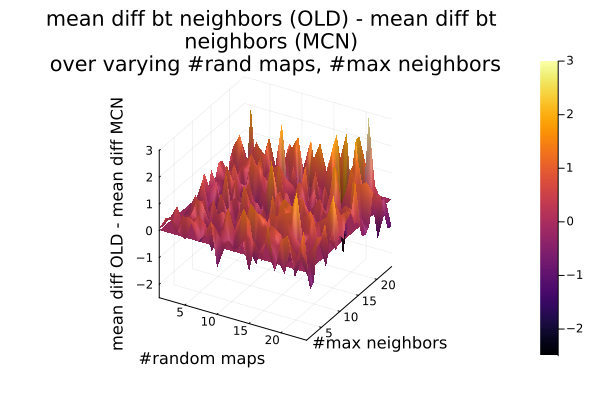

In [ ]:
n = 10
x = 15

max_dcj_dist = n + x

target = generate_target_with_xdup(n, x)
src = scramble_target(target)

run_mode = "none"
dupchar_to_unique_chars = OrderedDict{Char, Vector{Char}}()
min_change_neighbor = true 

total_maps = max_dcj_dist  # max
rand_maps = total_maps-1
max_neighbors = total_maps-1

mean_diff_data = test_LS(rand_maps, max_neighbors, src, target, run_mode, dupchar_to_unique_chars, min_change_neighbor)

x = 1:rand_maps 
y = 1:max_neighbors
z = mean_diff_data


xyplane = zeros(length(x), length(y))  
p = plot(x, y, xyplane, st=:surface, title="mean diff bt neighbors (OLD) - mean diff bt \nneighbors (MCN) \nover varying #rand maps, #max neighbors", xlabel="#random maps", ylabel="#max neighbors", zlabel="mean diff OLD - mean diff MCN")
# diff = new_neighbor - old_neighbor

avg_diff = mean(mean_diff_data)
median_diff = median(mean_diff_data)

println("\navg diff = ", avg_diff) 
println("median diff = ", median_diff)

plot!(p, x, y, z, st=:surface, label="Surface Plot")
